### MLP for analytes classification on the middle part of the spectra
#### Edgar Acuna
#### July 2020

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
#loading the data
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)

In [3]:
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)

In [4]:
dfset3=dfset1.copy()
dfset3=dfset3.iloc[:,600:1200]
b=pd.DataFrame(dfset3)
b.columns=b.columns-600
b.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,0.052649,0.052523,0.052400,0.052366,0.052187,0.051868,0.051646,0.051453,0.051322,0.051272,...,0.040485,0.042181,0.043665,0.044619,0.045198,0.045510,0.045584,0.045514,0.045368,0.045134
1,0.812850,0.815280,0.815310,0.816570,0.811340,0.814360,0.817900,0.810970,0.816380,0.814390,...,0.721050,0.732410,0.733920,0.746930,0.748780,0.755830,0.757070,0.761120,0.763920,0.757050
2,0.246650,0.247730,0.248770,0.249810,0.250880,0.251980,0.253020,0.253990,0.254890,0.255730,...,0.089065,0.092210,0.094679,0.096494,0.098360,0.100020,0.101490,0.102910,0.104620,0.106290
3,0.230050,0.231050,0.232060,0.233080,0.234140,0.235200,0.236210,0.237140,0.237990,0.238780,...,0.085115,0.088022,0.090564,0.092868,0.094941,0.096737,0.098254,0.099534,0.100620,0.101550
4,0.015893,0.016719,0.017483,0.016799,0.016883,0.016369,0.015751,0.018710,0.016324,0.016844,...,0.017459,0.016394,0.013416,0.015770,0.015645,0.015782,0.013516,0.015270,0.017566,0.015711


In [5]:
# Configuration options
feature_vector_length = 600
num_classes = 18000

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(b,y, test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

Train dimension:
(12600, 600)
Test dimension:
(5400, 600)


In [7]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.2, input_shape=input_shape))
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (600,)
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               240400    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_3 (Dense)              (None, 18000)             918000    
Total params: 1,178,450
Trainable params: 1,178,450
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 10080 samples, validate on 2520 samples
Epoch 1/100
10080/10080 [==============================] - 10s 1ms/step - loss: 4.6095 - accuracy: 0.0244 - val_loss: 3.8275 - val_accuracy: 0.0202
Epoch 2/100
10080/10080 [==============================] - 9s 935us/step - loss: 3.7437 - accuracy: 0.0249 - val_loss: 3.7062 - val_accuracy: 0.0298
Epoch 3/100
10080/10080 [==============================] - 10s 952us/step - loss: 3.6990 - accuracy: 0.0241 - val_loss: 3.6947 - val_accuracy: 0.0246698
Epoch 4/100
10080/10080 [==============================] - 10s 945us/step - loss: 3.6954 - accuracy: 0.0269 - val_loss: 3.7015 - val_accuracy: 0.0262
Epoch 5/100
10080/10080 [==============================] - 10s 1ms/step - loss: 3.6941 - accuracy: 0.0263 - val_loss: 3.6949 - val_accuracy: 0.0187
Epoch 6/100
10080/10080 [==============================] - 10s 978us/step - loss: 3.6931 - accuracy: 0.0273 - val_loss: 3.6936 - val_accuracy: 0.0329
Epoch

10080/10080 [==============================] - 10s 983us/step - loss: 3.0842 - accuracy: 0.1471 - val_loss: 2.8653 - val_accuracy: 0.2302
Epoch 54/100
10080/10080 [==============================] - 10s 1ms/step - loss: 3.0811 - accuracy: 0.1548 - val_loss: 2.9293 - val_accuracy: 0.1881
Epoch 55/100
10080/10080 [==============================] - 10s 955us/step - loss: 3.0794 - accuracy: 0.1518 - val_loss: 2.8408 - val_accuracy: 0.2393
Epoch 56/100
10080/10080 [==============================] - 10s 948us/step - loss: 3.0724 - accuracy: 0.1526 - val_loss: 2.8789 - val_accuracy: 0.1984
Epoch 57/100
10080/10080 [==============================] - 10s 1ms/step - loss: 3.0715 - accuracy: 0.1571 - val_loss: 2.8681 - val_accuracy: 0.2313
Epoch 58/100
10080/10080 [==============================] - 10s 950us/step - loss: 3.0649 - accuracy: 0.1545 - val_loss: 2.8861 - val_accuracy: 0.1988
Epoch 59/100
10080/10080 [==============================] - 10s 975us/step - loss: 3.0658 - accuracy: 0.1547 - 

In [9]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

5400/5400 [==============================] - 1s 275us/step
[2.743134161984479, 0.2629629671573639]
Test results - Loss: 2.743134161984479 - Accuracy: 0.2629629671573639%


### 2.  Classification of the first analyte

In [20]:
labels=list(range(1,41))

In [21]:
yclass=y.copy()
yclass[yclass!=13]=0
yclass[yclass==13]=1
X_train, X_test, yclass_train, yclass_test = train_test_split(b,yclass,test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
Y_train = to_categorical(yclass_train, num_classes)
Y_test = to_categorical(yclass_test, num_classes)

Train dimension:
(12600, 600)
Test dimension:
(5400, 600)


In [22]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.3, input_shape=input_shape))
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (600,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 400)               240400    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_6 (Dense)              (None, 18000)             918000    
Total params: 1,178,450
Trainable params: 1,178,450
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), keras.metrics.Precision(name="precision"),keras.metrics.Recall(name="recall")])
baseline_history=model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1, validation_split=0.2)

Train on 10080 samples, validate on 2520 samples
Epoch 1/50
10080/10080 [==============================] - 12s 1ms/step - loss: 1.9617 - accuracy: 1.0000 - precision: 0.9771 - recall: 0.7117 - val_loss: 0.3396 - val_accuracy: 1.0000 - val_precision: 0.9703 - val_recall: 0.9579
Epoch 2/50
10080/10080 [==============================] - 11s 1ms/step - loss: 0.2769 - accuracy: 1.0000 - precision: 0.9759 - recall: 0.9705 - val_loss: 0.3077 - val_accuracy: 1.0000 - val_precision: 0.9702 - val_recall: 0.9690
Epoch 3/50
10080/10080 [==============================] - 12s 1ms/step - loss: 0.2679 - accuracy: 1.0000 - precision: 0.9760 - recall: 0.9752 - val_loss: 0.3171 - val_accuracy: 1.0000 - val_precision: 0.9702 - val_recall: 0.9702
Epoch 4/50
10080/10080 [==============================] - 12s 1ms/step - loss: 0.2555 - accuracy: 1.0000 - precision: 0.9760 - recall: 0.9760 - val_loss: 0.2448 - val_accuracy: 1.0000 - val_precision: 0.9702 - val_recall: 0.9702
Epoch 5/50
10080/10080 [===========

In [24]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% -Precision: {test_results[2]}% -Recall: {test_results[3]}%')

5400/5400 [==============================] - 3s 472us/step
Test results - Loss: 0.11295229329279176 - Accuracy: 0.9999980926513672% -Precision: 0.9753703474998474% -Recall: 0.9753703474998474%


In [25]:
#Function for plotting
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'accuracy','precision','recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1])

    plt.legend()

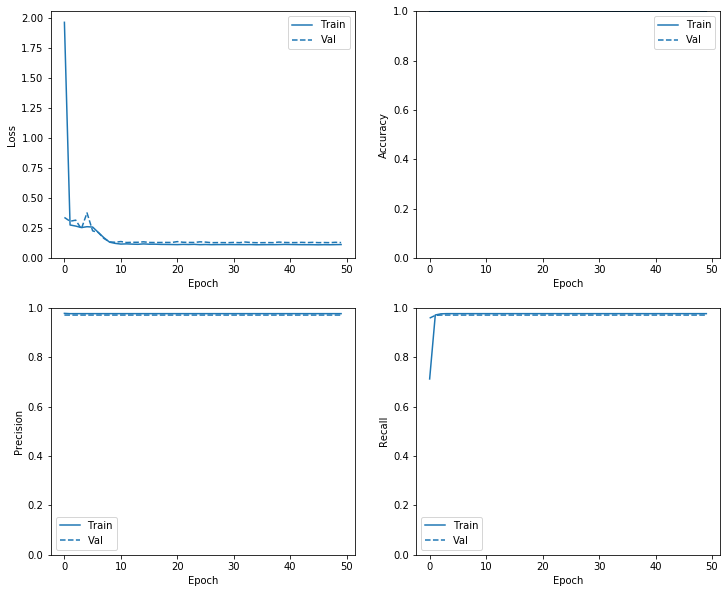

In [26]:
plot_metrics(baseline_history)

In [34]:
#Computing F1-score
train_features = np.array(X_train)
test_features = np.array(X_test)
train_labels=np.array(yclass_train)
test_labels=np.array(yclass_test)
print(len(test_labels))
print(np.count_nonzero(test_labels==1))
train_predictions_baseline = model.predict_classes(train_features, batch_size=100)
f1_train=sklearn.metrics.f1_score(train_labels, train_predictions_baseline, average=None)
test_predictions_baseline = model.predict_classes(test_features, batch_size=100)
print(np.count_nonzero(test_predictions_baseline==1))
f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average=None)
print('f1_scores, training set',f1_train,'f1_scores in testing set',f1_test)

5400
133
0
f1_scores, training set [0.98726038 0.        ] f1_scores in testing set [0.98753164 0.        ]


In [44]:
#The ROC curve
fp, tp, _ = sklearn.metrics.roc_curve(train_labels, train_predictions_baseline)
fp1, tp1, _ = sklearn.metrics.roc_curve(test_labels, test_predictions_baseline)
roc_auc = sklearn.metrics.auc(fp,tp)
roc_auc1 = sklearn.metrics.auc(fp1,tp1)
print(fp,tp)

[0. 1.] [0. 1.]


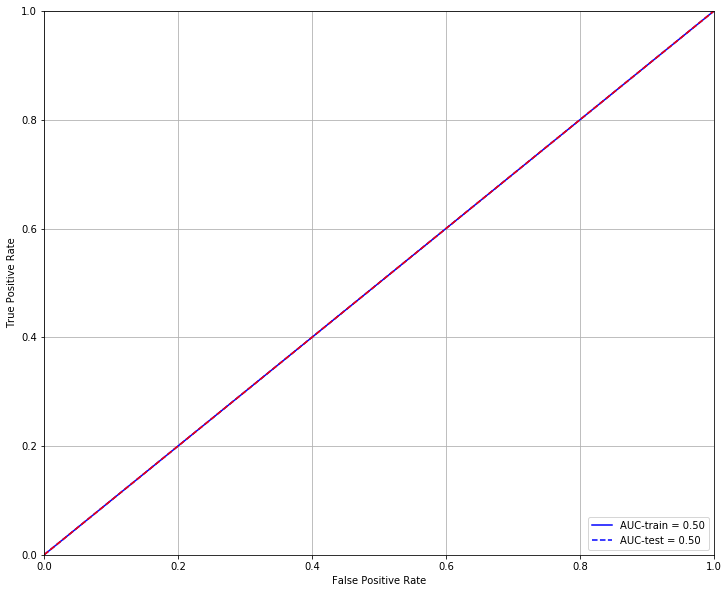

In [45]:
fig, ax = plt.subplots(1, 1)
ax.plot(fp, tp, 'b', label='AUC-train = %0.2f'% roc_auc)
ax.plot(fp1, tp1, 'b--', label='AUC-test = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()